In [1]:
import pandas as pd
import numpy as np
import wrangle_zillow
import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('figure',figsize=(12,8))

In [2]:
df_orig = wrangle_zillow.get_zillow_data()
df_orig.shape

(77381, 67)

In [3]:
df = df_orig.copy()
df = wrangle_zillow.handle_missing_values(df)
df = preprocessing.feature_engineering(df)
df.shape

/Users/camerontaylor/codeup-data-science/clustering_project/cameron_project/wrangle_zillow.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, thresh=threshold, inplace=True)
/Users/camerontaylor/codeup-data-science/clustering_project/cameron_project/wrangle_zillow.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, thresh=threshold, inplace=True)


(52302, 16)

In [4]:
cols = ['regionidcity','regionidzip']
wrangle_zillow.cols_as_strings(df,cols)

In [5]:
df.dtypes

logerror                        float64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
county                           object
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
rawcensustractandblock          float64
regionidcity                     object
regionidzip                      object
age                             float64
taxrate                         float64
land_sqft_price                 float64
house_sqft_price                float64
dtype: object

In [6]:
df.columns.tolist()

['logerror',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'county',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'rawcensustractandblock',
 'regionidcity',
 'regionidzip',
 'age',
 'taxrate',
 'land_sqft_price',
 'house_sqft_price']

In [7]:
df.head(1)

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,county,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidzip,age,taxrate,land_sqft_price,house_sqft_price
parcelid,,,,,,,,,,,,,,,,
10711855,0.025595,3.5,4.0,3100.0,Orange_County,33634931.0,-117869207.0,4506.0,122,6.059063e+07,53571.0,96978.0,19.0,0.010763,119.30071,156.681613


FIPS:

- 6037: Los Angeles County
- 6059: Orange County
- 6111: Ventura County

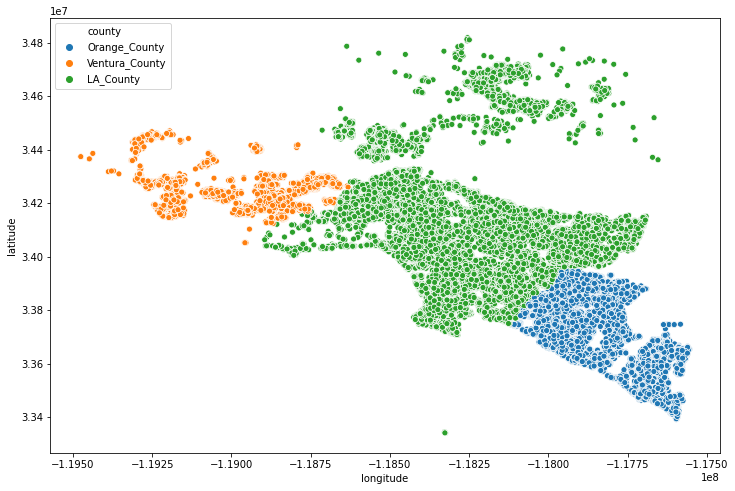

In [8]:
plt.rc('figure',figsize=(12,8))
sns.scatterplot('longitude', 'latitude', data=df, hue='county')

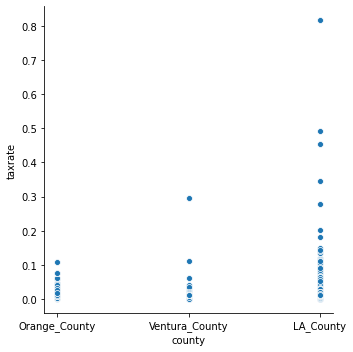

In [9]:
sns.relplot('county', 'taxrate', data=df)

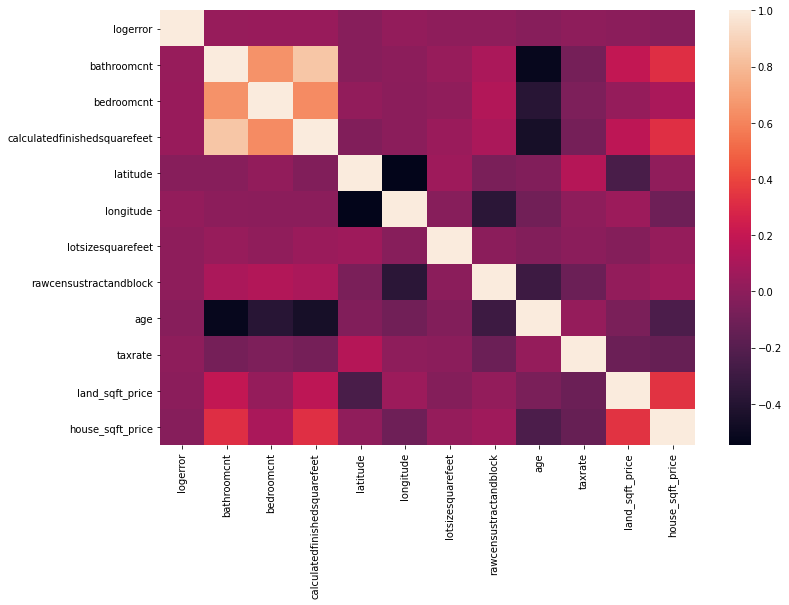

In [10]:
sns.heatmap(df.corr())

In [11]:
# sns.pairplot(df, corner=True)

In [12]:
df.shape

(52302, 16)

In [13]:
df.select_dtypes('number')

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,age,taxrate,land_sqft_price,house_sqft_price
parcelid,,,,,,,,,,,,
10711855,0.025595,3.5,4.0,3100.0,33634931.0,-117869207.0,4506.0,6.059063e+07,19.0,0.010763,119.300710,156.681613
10711877,0.055619,1.0,2.0,1465.0,34449266.0,-119281531.0,12647.0,6.111001e+07,50.0,0.012225,29.730371,60.068259
10711888,0.005383,2.0,3.0,1243.0,33886168.0,-117823170.0,8432.0,6.059022e+07,55.0,0.011488,56.865394,68.615447
10711910,-0.103410,3.0,4.0,2376.0,34245180.0,-118240722.0,13038.0,6.037300e+07,47.0,0.012247,2.778417,45.840909
10711956,-0.001011,3.0,4.0,2962.0,34145202.0,-118179824.0,63000.0,6.037461e+07,67.0,0.012306,7.882841,93.411209
...,...,...,...,...,...,...,...,...,...,...,...,...
167638926,0.037117,1.0,2.0,780.0,34043113.0,-118028669.0,8968.0,6.037434e+07,68.0,0.012349,30.893622,88.796154
167639152,0.001335,3.0,4.0,2630.0,34034575.0,-118424093.0,6357.0,6.037271e+07,72.0,0.012084,58.329873,138.626236
167655959,-0.007124,2.0,3.0,1296.0,33930530.0,-117984206.0,8688.0,6.037503e+07,61.0,0.011761,31.382942,143.584105


In [14]:
df_nonnumeric = df.drop(columns=df.select_dtypes('number').columns)
df_nonnumeric.head()

,county,propertycountylandusecode,regionidcity,regionidzip
parcelid,,,,
10711855,Orange_County,122,53571.0,96978.0
10711877,Ventura_County,1110,13091.0,97099.0
10711888,Orange_County,122,21412.0,97078.0
10711910,LA_County,0101,396551.0,96330.0
10711956,LA_County,0101,47019.0,96293.0


In [15]:
cols_with_outliers = (df.select_dtypes('number')
                              .columns.tolist()[1:])
cols_with_outliers

['bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'rawcensustractandblock',
 'age',
 'taxrate',
 'land_sqft_price',
 'house_sqft_price']

In [16]:
for s in cols_with_outliers:
    print(wrangle_zillow.count_outliers(df[s],'iqr'))

26
7
135
0
0
2175
0
0
816
560
218


In [17]:
df = wrangle_zillow.drop_all_outliers(df, cols_with_outliers)

In [18]:
for s in cols_with_outliers:
    print(wrangle_zillow.count_outliers(df[s],'iqr'))

0
0
11
0
0
61
0
0
20
0
6


In [19]:
X = df.drop(columns='logerror')
y = pd.DataFrame(df['logerror'])

In [20]:
X.shape

(48145, 15)

In [21]:
county_df = pd.get_dummies(X.county)
county_df.shape
X = pd.concat([X, county_df], axis = 1)

In [22]:
X.isna().sum(), X.shape

(bathroomcnt                     0
 bedroomcnt                      0
 calculatedfinishedsquarefeet    0
 county                          0
 latitude                        0
 longitude                       0
 lotsizesquarefeet               0
 propertycountylandusecode       0
 rawcensustractandblock          0
 regionidcity                    0
 regionidzip                     0
 age                             0
 taxrate                         0
 land_sqft_price                 0
 house_sqft_price                0
 LA_County                       0
 Orange_County                   0
 Ventura_County                  0
 dtype: int64, (48145, 18))

In [23]:
X.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,county,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidzip,age,taxrate,land_sqft_price,house_sqft_price,LA_County,Orange_County,Ventura_County
parcelid,,,,,,,,,,,,,,,,,,
10711855,3.5,4.0,3100.0,Orange_County,33634931.0,-117869207.0,4506.0,122,6.059063e+07,53571.0,96978.0,19.0,0.010763,119.300710,156.681613,0,1,0
10711877,1.0,2.0,1465.0,Ventura_County,34449266.0,-119281531.0,12647.0,1110,6.111001e+07,13091.0,97099.0,50.0,0.012225,29.730371,60.068259,0,0,1
10711888,2.0,3.0,1243.0,Orange_County,33886168.0,-117823170.0,8432.0,122,6.059022e+07,21412.0,97078.0,55.0,0.011488,56.865394,68.615447,0,1,0
10711910,3.0,4.0,2376.0,LA_County,34245180.0,-118240722.0,13038.0,0101,6.037300e+07,396551.0,96330.0,47.0,0.012247,2.778417,45.840909,1,0,0
10711995,1.0,2.0,738.0,LA_County,34149214.0,-118239357.0,4214.0,0100,6.037302e+07,45457.0,96325.0,95.0,0.010826,47.380636,25.596206,1,0,0


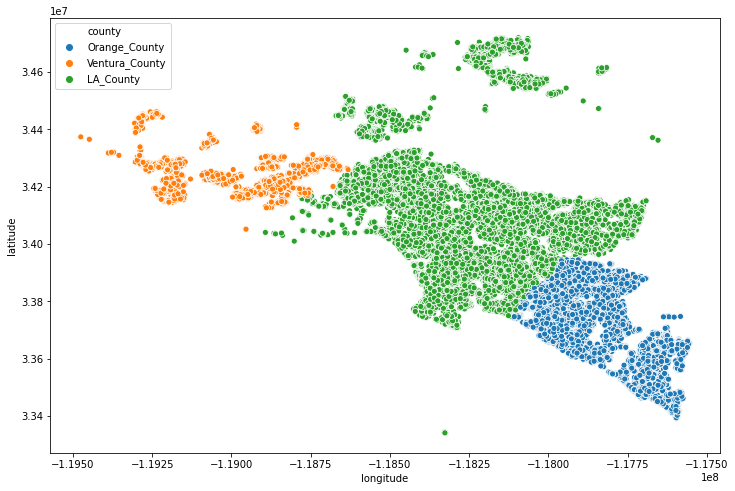

In [24]:
sns.scatterplot('longitude', 'latitude', data=X, hue='county')

# Train/Test Split

In [25]:
X_train, X_validate, X_test, y_train, y_validate, y_test = (
        preprocessing.split_data(X,y))
X_validate.shape

(7704, 18)

In [26]:
X_train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,county,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidzip,age,taxrate,land_sqft_price,house_sqft_price,LA_County,Orange_County,Ventura_County
parcelid,,,,,,,,,,,,,,,,,,
12912292,4.0,3.0,4214.0,LA_County,34102749.0,-118360554.0,5401.0,0100,6.037194e+07,12447.0,96027.0,15.0,0.012101,277.968154,142.505933,1,0,0
14336738,2.0,3.0,1427.0,Orange_County,33680950.0,-117921331.0,7686.0,122,6.059064e+07,38032.0,96958.0,58.0,0.011707,59.323705,57.714786,0,1,0
12265607,2.0,4.0,2227.0,Orange_County,33794080.0,-117932536.0,7204.0,122,6.059088e+07,24832.0,97047.0,62.0,0.012469,52.585508,50.227211,0,1,0
11548937,3.0,3.0,2415.0,LA_County,34164746.0,-118250550.0,6314.0,0100,6.037301e+07,45457.0,96326.0,63.0,0.011025,37.386760,64.898965,1,0,0
17090345,1.0,3.0,1400.0,LA_County,33792171.0,-118185970.0,6096.0,0100,6.037573e+07,46298.0,96240.0,68.0,0.012278,41.913386,84.691429,1,0,0


In [27]:
train_scaled, validate_scaled, test_scaled = \
        preprocessing.scale_data(X_train.select_dtypes('number'),
                                 X_validate.select_dtypes('number'),
                                 X_test.select_dtypes('number'))

In [28]:
train_scaled.head(3)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,age,taxrate,land_sqft_price,house_sqft_price,LA_County,Orange_County,Ventura_County
parcelid,,,,,,,,,,,,,,
12912292,0.50,0.333333,0.568527,0.552227,0.580421,0.223638,0.001258,0.097744,0.514092,0.912329,0.357250,1.0,0.0,0.0
14336738,0.25,0.333333,0.180743,0.246356,0.809091,0.328763,0.297163,0.421053,0.497045,0.193579,0.144626,0.0,1.0,0.0
12265607,0.25,0.444444,0.292055,0.328393,0.803257,0.306588,0.297494,0.451128,0.530044,0.171429,0.125850,0.0,1.0,0.0


In [29]:
train_scaled.shape

(30812, 14)

In [30]:
y_train.shape, y_validate.shape, y_test.shape

((30812, 1), (7704, 1), (9629, 1))

In [31]:
X_train.shape, X_validate.shape, X_test.shape

((30812, 18), (7704, 18), (9629, 18))

In [32]:
from sklearn.cluster import KMeans

     k         sse
0    2  499.894674
1    3  354.786569
2    4  246.750080
3    5  184.371397
4    6  135.178714
5    7  101.412826
6    8   77.816818
7    9   59.714068
8   10   48.886623
9   11   41.147629
10  12   34.990354
11  13   30.347176
12  14   25.792817
13  15   22.513678
14  16   19.714494
15  17   17.302055
16  18   14.971249
17  19   13.345903


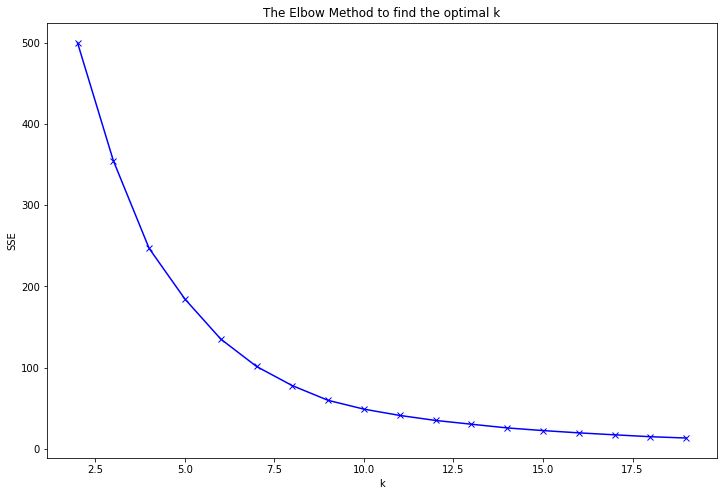

In [33]:
ks = range(2,20)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(y_train)

    # inertia: Sum of squared distances of samples to their 
    # closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(y_train)

y_train['cluster_target'] = kmeans.predict(y_train)
y_train

,logerror,cluster_target
parcelid,,
12912292,-0.036455,4
14336738,0.097575,1
12265607,0.021456,4
11548937,0.063968,1
17090345,0.023119,4
...,...,...
11789010,0.030953,4
14100507,-0.080344,0
11112602,0.121749,1


In [39]:
y_train.head(1)

,logerror,cluster_target
parcelid,,
12912292,-0.036455,4


KeyError: 'logerror'

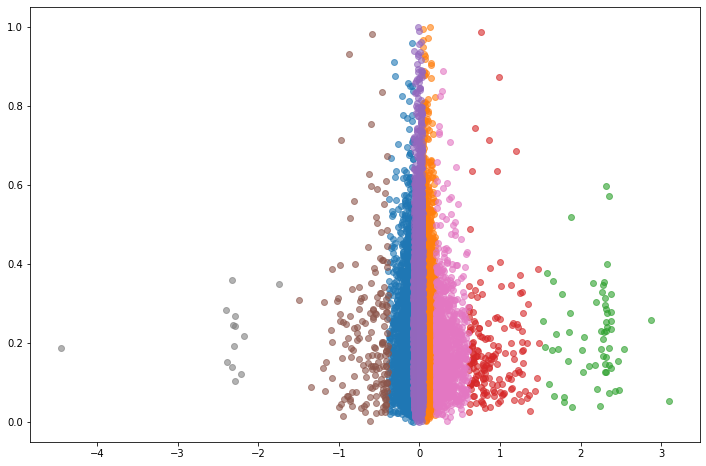

In [40]:
train = pd.concat([train_scaled, y_train], axis=1)
for cluster, subset in train.groupby('cluster_target'):
    plt.scatter(subset.logerror, subset.house_sqft_price, 
                label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(x='logerror', y='house_sqft_price',
                      c='black', marker='x', s=1000, ax=plt.gca(),
                      label='centroid')

plt.legend()
plt.xlabel('logerror')
plt.ylabel('house_sqft_price')
plt.title('Visualizing Cluster Centers')